<a href="https://colab.research.google.com/github/chrryyy/cs_4774_team_snorlax/blob/main/Analysis_of_Improving_Pedestrian_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4VA - Analysis of Improving Pedestrian Safety
Cheryl Bai, Eric Xie, Elaine Zhang

## Getting the Data

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(42)

crash_data = pd.DataFrame()
# read the dataset
for i in range(6):
  df = pd.read_csv("Crash_2020_2023_" + str(i) + ".csv")
  df_ped = df.loc[df["PED_NONPED"] == "Yes"]
  crash_data = pd.concat([crash_data, df_ped], ignore_index=True)

crash_data = crash_data.reset_index(drop=True)
crash_data

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-76.589129,37.213034,641773,203305319,2020,2020/10/22 03:59:59+00,1135,A,0,1,...,Urban,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA SR00143NB,27.07,646123.0,190.0
1,-76.709165,37.333128,641816,202645276,2020,2020/09/19 03:59:59+00,1330,A,0,1,...,Rural,VDOT Interstate,5,1. State Hwy Agency,Hampton Roads,HAMP,R-VA IS00064WB,236.33,NaN,NaN
2,-77.379622,37.214527,641989,203605036,2020,2020/12/22 05:00:00+00,1837,B,0,0,...,Urban,VDOT Interstate,1,1. State Hwy Agency,Crater,TCAT,R-VA IS00095NB DCR050.00X,0.31,709761.0,623.0
3,-77.221516,37.643252,641994,202605140,2020,2020/09/15 03:59:59+00,640,B,0,0,...,Rural,VDOT Secondary,1,1. State Hwy Agency,Richmond Regional,RICH,R-VA042SC00628NB,7.54,374391.0,554.0
4,-76.350701,36.822881,642032,202745098,2020,2020/09/29 03:59:59+00,1053,A,0,1,...,Urban,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA US00058EB,485.78,483072.0,1146.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,-78.489160,38.056671,1048299,232425285,2023,2023/08/22 03:59:59+00,1913,B,0,0,...,Urban,NonVDOT primary,3,3. City or Town Hwy Agency,Thomas Jefferson,CVIL,R-VA US00250EB,95.64,111429.0,375.0
4898,-77.444396,37.551889,1048339,230765253,2023,2023/03/17 03:59:59+00,1727,A,0,1,...,Urban,NonVDOT primary,1,3. City or Town Hwy Agency,Richmond Regional,RICH,R-VA US00001NB,93.84,209567.0,48.0
4899,-77.404846,38.899678,1048473,232245088,2023,2023/07/09 03:59:59+00,2240,A,0,1,...,Urban,VDOT Primary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA SR00286SB,23.21,NaN,NaN
4900,-76.963614,38.254560,1048521,231675202,2023,2023/06/16 03:59:59+00,1200,C,0,0,...,Rural,NonVDOT secondary,1,3. City or Town Hwy Agency,Northern Neck,NaN,S-VA199NP WASHINGTON AVE,0.30,NaN,NaN


In [2]:
# select relevant columns for analysis
cols = ["X", "Y", "CRASH_YEAR", "CRASH_MILITARY_TM", "CRASH_SEVERITY", "PEDESTRIANS_KILLED", "PEDESTRIANS_INJURED", "WEATHER_CONDITION", "LIGHT_CONDITION",
        "ROADWAY_SURFACE_COND", "RELATION_TO_ROADWAY", "ROADWAY_ALIGNMENT", "ROADWAY_SURFACE_TYPE", "ROADWAY_DEFECT", "ROADWAY_DESCRIPTION", "INTERSECTION_TYPE",
        "TRAFFIC_CONTROL_TYPE", "TRFC_CTRL_STATUS_TYPE", "SCHOOL_ZONE", "FIRST_HARMFUL_EVENT", "FIRST_HARMFUL_EVENT_LOC", "ALCOHOL_NOTALCOHOL", "DISTRACTED_NOTDISTRACTED",
        "DROWSY_NOTDROWSY", "DRUG_NODRUG", "SPEED_NOTSPEED", "INTERSECTION_ANALYSIS", "SENIOR_NOTSENIOR", "YOUNG_NOTYOUNG", "MAINLINE_YN", "NIGHT", "AREA_TYPE",
        "SPEED_DIFF_MAX"]

crash_data = crash_data[cols]

In [3]:
# quick summary of the dataset
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4902 entries, 0 to 4901
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   X                         4902 non-null   float64
 1   Y                         4902 non-null   float64
 2   CRASH_YEAR                4902 non-null   int64  
 3   CRASH_MILITARY_TM         4902 non-null   int64  
 4   CRASH_SEVERITY            4902 non-null   object 
 5   PEDESTRIANS_KILLED        4902 non-null   int64  
 6   PEDESTRIANS_INJURED       4902 non-null   int64  
 7   WEATHER_CONDITION         4902 non-null   object 
 8   LIGHT_CONDITION           4902 non-null   object 
 9   ROADWAY_SURFACE_COND      4902 non-null   object 
 10  RELATION_TO_ROADWAY       4902 non-null   object 
 11  ROADWAY_ALIGNMENT         4902 non-null   object 
 12  ROADWAY_SURFACE_TYPE      4902 non-null   object 
 13  ROADWAY_DEFECT            4902 non-null   object 
 14  ROADWAY_

In [4]:
# information about number of entires and features
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[0]) + " entries.")
print("The selected pedestrian related crash dataset has " + str(crash_data.shape[1]) + " features.")

The selected pedestrian related crash dataset has 4902 entries.
The selected pedestrian related crash dataset has 33 features.


In [5]:
# check for missing values
if crash_data.isnull().sum().sum() > 0 :
  print("The dataset contains missing values.")
else:
  print("The dataset doesn't contain missing values.")

The dataset contains missing values.


In [6]:
# basic statistics about the dataset
crash_data.describe()

,X,Y,CRASH_YEAR,CRASH_MILITARY_TM,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,SPEED_DIFF_MAX
count,4902.000000,4902.000000,4902.000000,4902.00000,4902.000000,4902.000000,362.000000
mean,-77.535697,37.824514,2021.368013,1480.27703,0.098735,0.949000,10.676796
std,1.202992,0.820512,1.029468,594.11329,0.301060,0.393077,9.679516
min,-83.548218,36.555105,2020.000000,0.00000,0.000000,0.000000,1.000000
25%,-77.540627,37.078773,2020.000000,1100.00000,0.000000,1.000000,5.000000
50%,-77.373746,37.552246,2021.000000,1630.00000,0.000000,1.000000,5.500000
75%,-77.049164,38.789131,2022.000000,1934.00000,0.000000,1.000000,14.750000
max,-75.361560,39.319785,2023.000000,2359.00000,2.000000,7.000000,65.000000


In [7]:
# rename variables
crash_data = crash_data.rename(columns={'X': 'longitude', 'Y': 'latitude'})

In [8]:
crash_data['CRASH_SEVERITY'].value_counts()

B    2565
A    1415
K     484
C     438
Name: CRASH_SEVERITY, dtype: int64

## Data Discovery

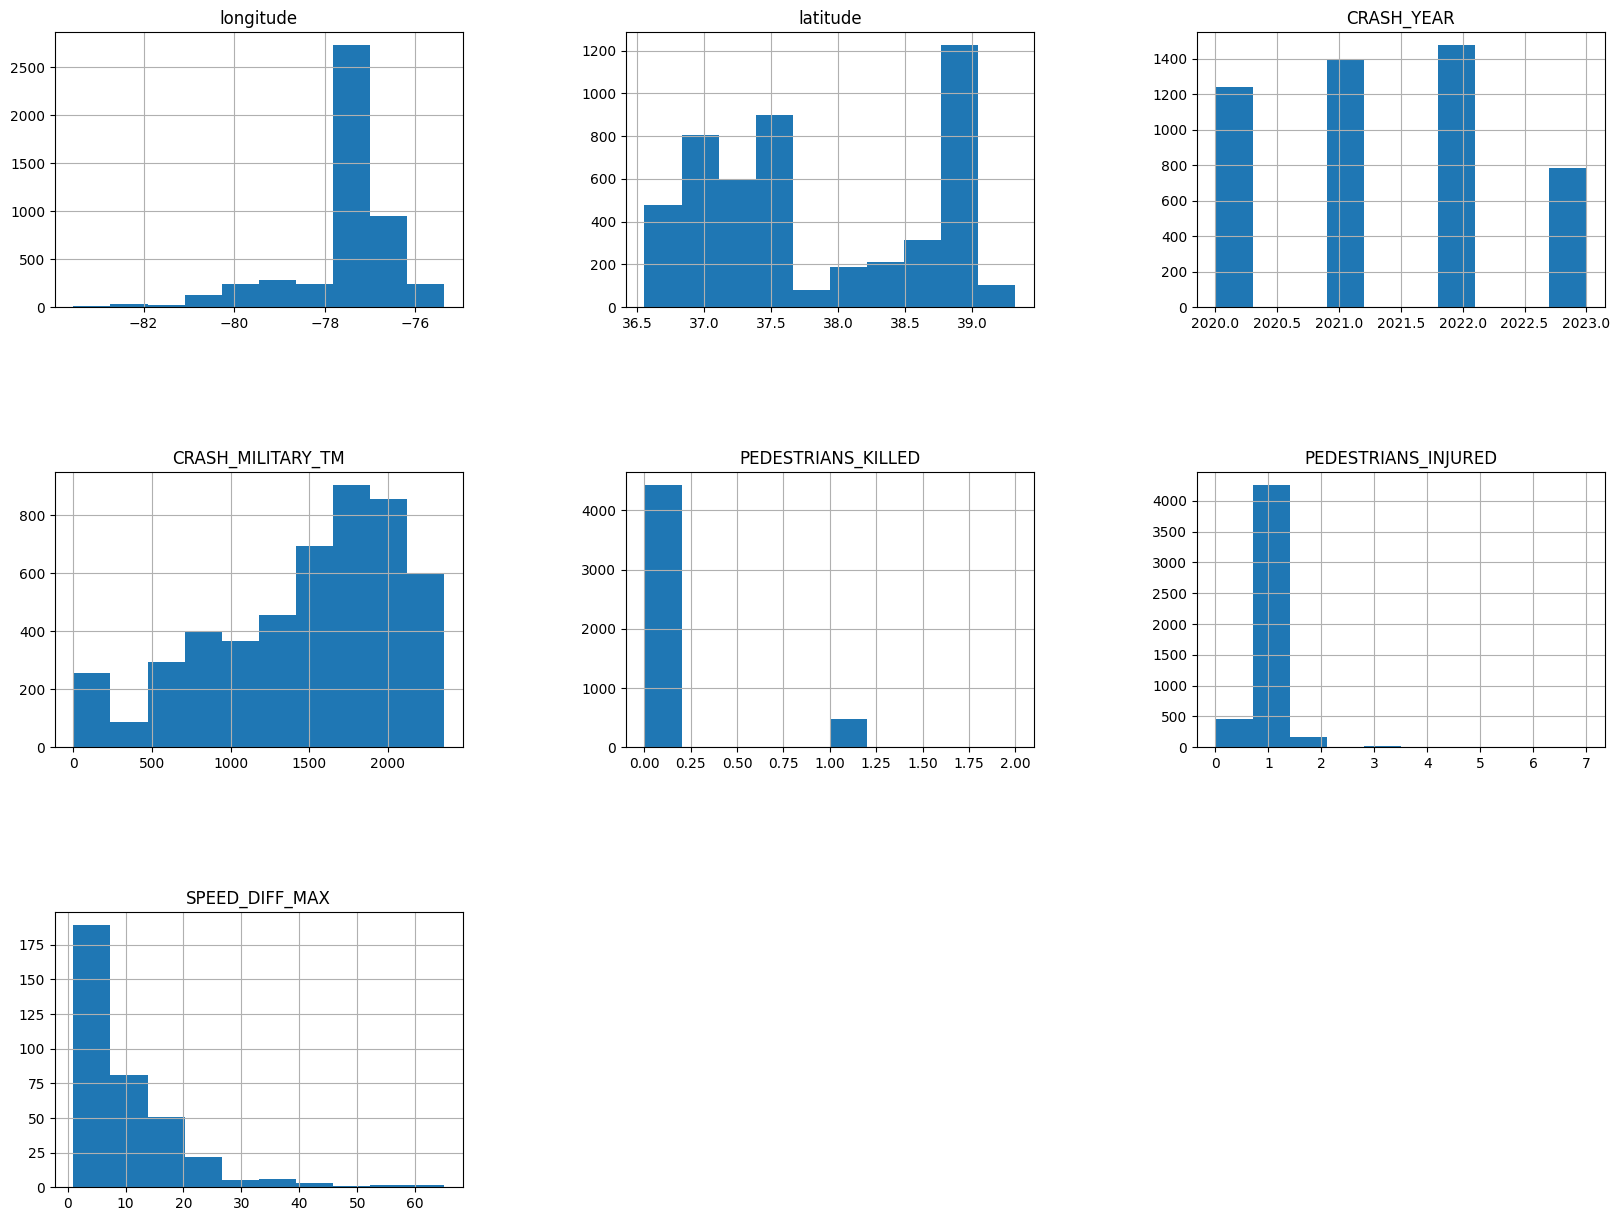

In [9]:
# plotting the features
crash_data.hist(bins = 10, figsize = (20, 15))
plt.subplots_adjust(wspace = 0.4,hspace = 0.6)
plt.show()

In [10]:
from scipy.stats import chi2_contingency
corr_data = crash_data.drop(columns=['longitude', 'latitude', 'CRASH_MILITARY_TM', 'CRASH_YEAR'])
# https://www.geeksforgeeks.org/how-to-calculate-cramers-v-in-python/# used this source to code cramer's
# to create a correlation matrix with categorical and numerical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    minimum_dimension = min(confusion_matrix.shape)-1
    return np.sqrt(phi2 / minimum_dimension)

cramer_matrix = pd.DataFrame(index=corr_data.columns, columns=corr_data.columns)
for i in corr_data.columns:
    for j in corr_data.columns:
        cramer_matrix.loc[i,j] = cramers_v(crash_data[i], crash_data[j])

C:\Users\Eric\AppData\Local\Temp\ipykernel_3552\2273849254.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / minimum_dimension)
C:\Users\Eric\AppData\Local\Temp\ipykernel_3552\2273849254.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2 / minimum_dimension)


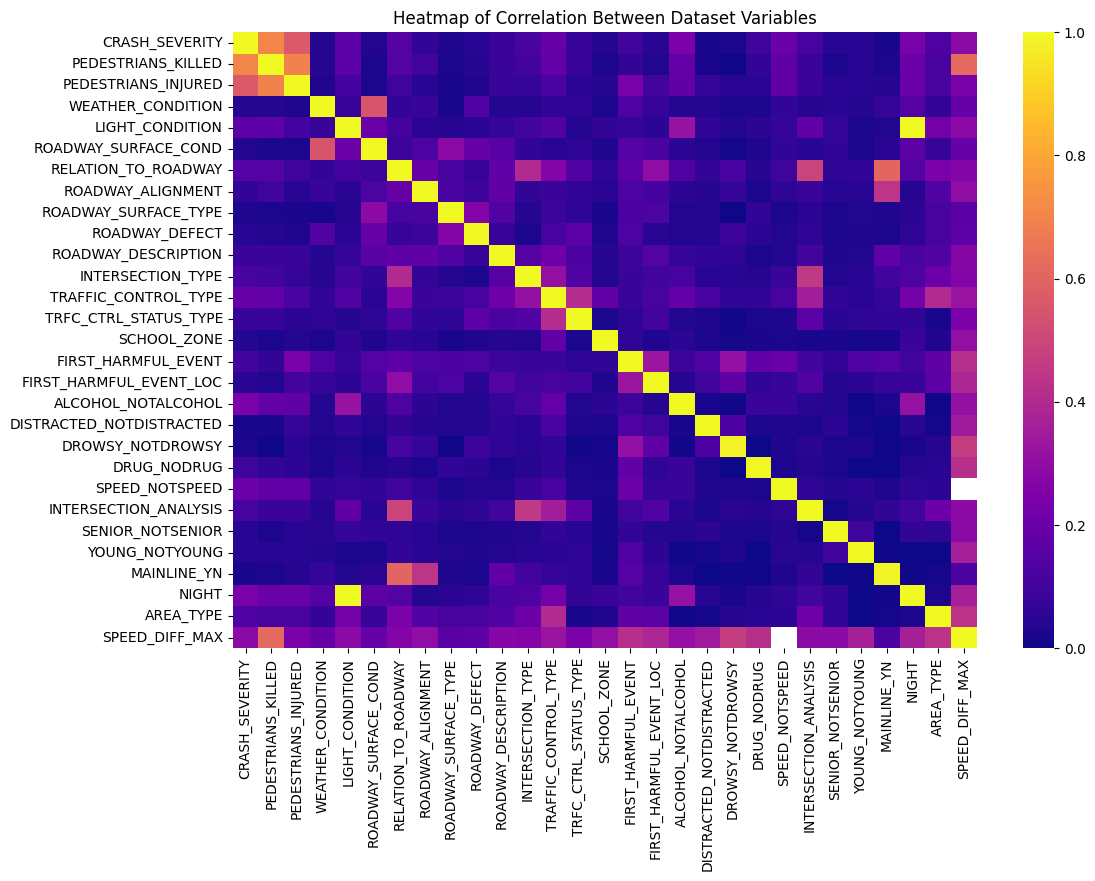

In [11]:
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(cramer_matrix.astype(float), annot=False, cmap="plasma")
plt.title("Heatmap of Correlation Between Dataset Variables")
plt.show()

In [12]:
! pip install basemap

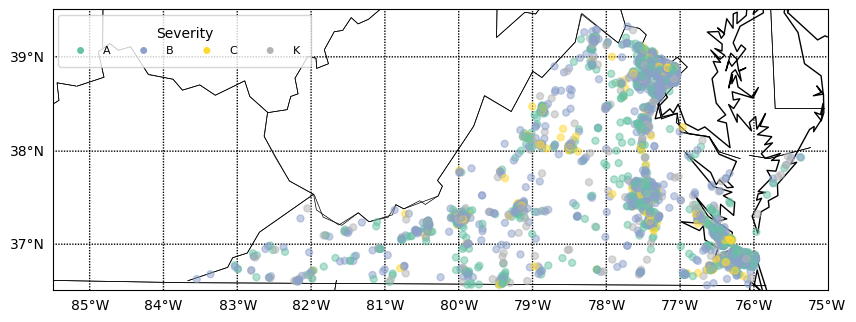

In [13]:
from math import nan
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)

plt.show()

## Data Preparation and Cleaning

In [21]:
crash_data.columns

Index(['longitude', 'latitude', 'CRASH_YEAR', 'CRASH_MILITARY_TM',
       'CRASH_SEVERITY', 'PEDESTRIANS_KILLED', 'PEDESTRIANS_INJURED',
       'WEATHER_CONDITION', 'LIGHT_CONDITION', 'ROADWAY_SURFACE_COND',
       'RELATION_TO_ROADWAY', 'ROADWAY_ALIGNMENT', 'ROADWAY_SURFACE_TYPE',
       'ROADWAY_DEFECT', 'ROADWAY_DESCRIPTION', 'INTERSECTION_TYPE',
       'TRAFFIC_CONTROL_TYPE', 'TRFC_CTRL_STATUS_TYPE', 'SCHOOL_ZONE',
       'FIRST_HARMFUL_EVENT', 'FIRST_HARMFUL_EVENT_LOC', 'ALCOHOL_NOTALCOHOL',
       'DISTRACTED_NOTDISTRACTED', 'DROWSY_NOTDROWSY', 'DRUG_NODRUG',
       'SPEED_NOTSPEED', 'INTERSECTION_ANALYSIS', 'SENIOR_NOTSENIOR',
       'YOUNG_NOTYOUNG', 'MAINLINE_YN', 'NIGHT', 'AREA_TYPE',
       'SPEED_DIFF_MAX'],
      dtype='object')

In [23]:
# split the data into train set, validation set and test set
from sklearn.model_selection import train_test_split

drop_columns = ["CRASH_MILITARY_TM", "CRASH_SEVERITY", 'K_PEOPLE', 'A_PEOPLE', 'B_PEOPLE', 'PERSONS_INJURED', 'PEDESTRIANS_KILLED', 'PEDESTRIANS_INJURED', 'COLLISION_TYPE']

drop_columns = [col for col in drop_columns if col in crash_data.columns]

X = crash_data.drop(columns=drop_columns)
y = crash_data["CRASH_SEVERITY"].copy()
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [24]:
# separate into numerical and categorical
crash_num = X_train.select_dtypes(include=[np.number])
crash_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# transformation pipeline for numerical data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

In [28]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.01)

my_model = keras.Sequential()

my_model.add(keras.layers.InputLayer(input_shape=(X_train_prepared.shape[1],)))
my_model.add(keras.layers.Dense(100, activation="tanh"))
# my_model.add(keras.layers.Dense(100, activation="tanh"))
my_model.add(keras.layers.Dense(4, activation="softmax"))

my_model.compile(loss="categorical_crossentropy",
                 optimizer=optimizer,
                 metrics=["accuracy"])

encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_val_encoded = encoder.transform(y_val.to_numpy().reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1))

my_model.fit(X_train_prepared, y_train_encoded, epochs=50, validation_data=(X_val_prepared, y_val_encoded))
results = my_model.evaluate(X_test_prepared, y_test_encoded)
print("Loss on test set: ", results[0])
print("Accuracy on test set: ", results[1])


Epoch 1/50


c:\Users\Eric\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


111/111 [==============================] - 2s 7ms/step - loss: 1.1009 - accuracy: 0.5269 - val_loss: 1.0358 - val_accuracy: 0.5649
Epoch 2/50
111/111 [==============================] - 0s 3ms/step - loss: 1.0402 - accuracy: 0.5570 - val_loss: 1.0244 - val_accuracy: 0.5751
Epoch 3/50
111/111 [==============================] - 0s 3ms/step - loss: 1.0274 - accuracy: 0.5624 - val_loss: 1.0158 - val_accuracy: 0.5852
Epoch 4/50
111/111 [==============================] - 0s 4ms/step - loss: 1.0189 - accuracy: 0.5652 - val_loss: 1.0175 - val_accuracy: 0.5827
Epoch 5/50
111/111 [==============================] - 0s 4ms/step - loss: 1.0131 - accuracy: 0.5649 - val_loss: 1.0264 - val_accuracy: 0.5878
Epoch 6/50
111/111 [==============================] - 0s 3ms/step - loss: 1.0085 - accuracy: 0.5740 - val_loss: 1.0109 - val_accuracy: 0.5878
Epoch 7/50
111/111 [==============================] - 0s 3ms/step - loss: 1.0029 - accuracy: 0.5788 - val_loss: 1.0148 - val_accuracy: 0.5878
Epoch 8/50
111/11

In [32]:
params = {
    # 'objective': 'binary:logistic',  # Binary classification
    'objective': 'multi:softmax',  # Multiclass classification
    'eval_metric': 'auc',  # Evaluation metric
    'eta': 0.01,  # Learning rate
    'max_depth': 6,  # Maximum depth of a tree
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 1,  # Subsample ratio of columns when constructing each tree
    'min_child_weight': 100,  # Minimum sum of instance weight needed in a child
    'gamma': 0,  # Minimum loss reduction required to make a further partition on a leaf node
    'alpha': 1,  # L1 regularization term on weights
    'lambda': 0,  # L2 regularization term on weights
    'seed': 42,  # Random seed
}

In [36]:
from sklearn.metrics import accuracy_score
import xgboost as xgb

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

label_mapping = {'A': 0, 'B': 1, 'C': 2, 'K': 3}
y_train_mapped = y_train.map(label_mapping)
y_val_mapped = y_val.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

model = xgb.XGBClassifier(**params)
model.fit(X_train_prepared, y_train_mapped)
y_pred = model.predict(X_test_prepared)
accuracy = accuracy_score(y_test_mapped, y_pred)
print(accuracy)

0.5300713557594292


In [37]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBClassifier(random_state=42)

param_grid = {
    'objective': ['multi:softmax'],
    'eval_metric': ['mlogloss'],
    'eta': [0.01, 0.1, 0.2],
    'max_depth': [6, 8, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [50, 100, 200],
    'gamma': [0, 0.1, 0.2],
    'alpha': [0, 1, 2],
    'lambda': [0, 1, 2],
    'seed': [42],
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2,
)

grid_search.fit(X_train_prepared, y_train_mapped)

Fitting 3 folds for each of 4374 candidates, totalling 13122 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 1, 2], 'colsample_bytree': [0.8, 1.0],
                         'eta': [0.01, 0.1, 0.2], 'eval_metric': ['mlogloss'],
                         'gamma': [0, 0.1, 0.2], 'lambda': [0, 1, 2],
                         'max_depth': [6, 8, 10],
                         'min_child_weight': [50, 100, 200],
                         'objective': ['multi:softmax'], 'seed': [42],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

Original Accuracy: 0.5300713557594292

Permutation Importance:
longitude: 0.0
latitude: 0.0
CRASH_YEAR: 0.0
WEATHER_CONDITION: 0.0
LIGHT_CONDITION: 0.0
ROADWAY_SURFACE_COND: 0.0
RELATION_TO_ROADWAY: 0.0
ROADWAY_ALIGNMENT: 0.0
ROADWAY_SURFACE_TYPE: 0.0
ROADWAY_DEFECT: 0.0
ROADWAY_DESCRIPTION: 0.0
INTERSECTION_TYPE: 0.0
TRAFFIC_CONTROL_TYPE: 0.0
TRFC_CTRL_STATUS_TYPE: 0.0
SCHOOL_ZONE: 0.0
FIRST_HARMFUL_EVENT: 0.0
FIRST_HARMFUL_EVENT_LOC: 0.0
ALCOHOL_NOTALCOHOL: 0.0
DISTRACTED_NOTDISTRACTED: 0.0
DROWSY_NOTDROWSY: 0.0
DRUG_NODRUG: 0.0
SPEED_NOTSPEED: 0.0
INTERSECTION_ANALYSIS: 0.0
SENIOR_NOTSENIOR: 0.0
YOUNG_NOTYOUNG: 0.0
MAINLINE_YN: 0.0
NIGHT: 0.0
AREA_TYPE: 0.0
SPEED_DIFF_MAX: 0.0

Number of features: 29


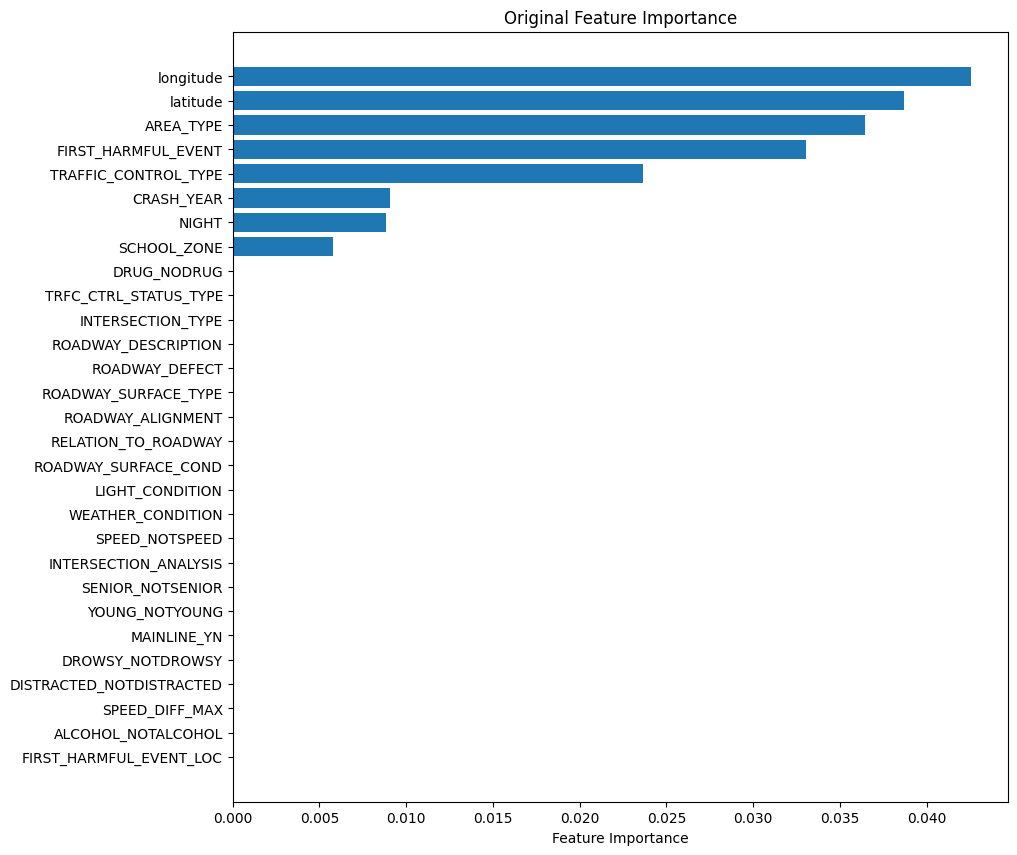

In [45]:
#Permutation Importance
from sklearn.inspection import permutation_importance

#Run initial train
model = xgb.XGBClassifier(**params)
model.fit(X_train_prepared, y_train_mapped)
y_pred = model.predict(X_test_prepared)
accuracy = accuracy_score(y_test_mapped, y_pred)
print("Original Accuracy:", accuracy)

X_test_dense = X_test_prepared.toarray()

#Calculate importance
perm_importance = permutation_importance(model, X_test_dense, y_test_mapped, n_repeats=30, random_state=42)
importance_scores = perm_importance.importances_mean

feature_importance = list(zip(X_train.columns, importance_scores))

#Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)
print("\nPermutation Importance:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")

#Feature importances
feature_importances = model.feature_importances_
indices = feature_importances.argsort()

print("\nNumber of features:", len(X_train.columns))
valid_indices = indices[indices < len(X_train.columns)]

#Plot feature importances using valid indices
plt.figure(figsize=(10, 10))
plt.barh(range(len(valid_indices)), feature_importances[valid_indices])
plt.yticks(range(len(valid_indices)), X_train.columns[valid_indices])
plt.xlabel('Feature Importance')
plt.title('Original Feature Importance')
plt.show()

In [154]:
from sklearn.metrics import classification_report
print(y_test.shape)
print(classification_report(y_test_mapped, y_pred))

(981,)
              precision    recall  f1-score   support

           0       0.48      0.21      0.29       308
           1       0.56      0.94      0.70       500
           2       0.00      0.00      0.00        88
           3       0.25      0.04      0.06        85

    accuracy                           0.55       981
   macro avg       0.32      0.30      0.26       981
weighted avg       0.46      0.55      0.46       981



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score

X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = RandomForestClassifier(max_depth= 4, max_features= None, min_samples_leaf= 3, min_samples_split= 3, n_estimators= 97)

rfc.fit(X_train_prepared, y_train)
y_pred = rfc.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5565749235474006


Number of features: 29


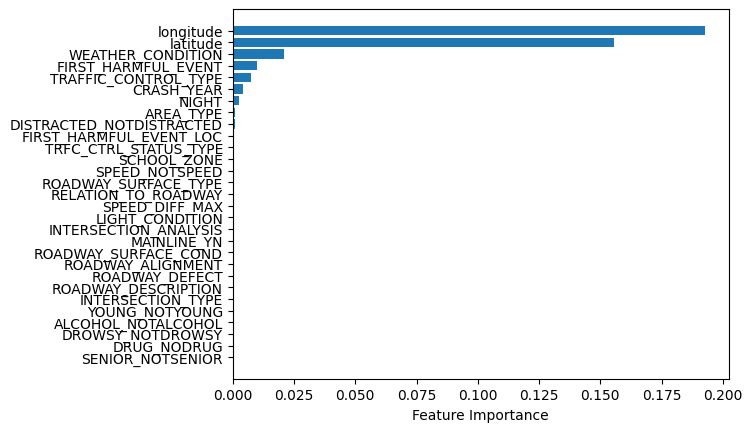

In [89]:
feature_importances = rfc.feature_importances_
indices = feature_importances.argsort()

print("Number of features:", len(X_train.columns))
valid_indices = indices[indices < len(X_train.columns)]

# Plot feature importances using valid indices
plt.barh(range(len(valid_indices)), feature_importances[valid_indices])
plt.yticks(range(len(valid_indices)), X_train.columns[valid_indices])
plt.xlabel('Feature Importance')
plt.show()

In [90]:
# based on important features, create a new model
X = crash_data[["longitude", "latitude", "WEATHER_CONDITION", "FIRST_HARMFUL_EVENT", "TRAFFIC_CONTROL_TYPE", "NIGHT",
                "AREA_TYPE", "DISTRACTED_NOTDISTRACTED"]]
y = crash_data["CRASH_SEVERITY"].copy()
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

crash_num = X_train.select_dtypes(include=[np.number])
crash_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

In [93]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

# rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc = RandomForestClassifier(max_depth= 4, max_features= None, min_samples_leaf= 3, min_samples_split= 3, n_estimators= 97)

rfc.fit(X_train_prepared, y_train)
y_pred = rfc.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5443425076452599


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

rfc = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(X_train_prepared, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 201}


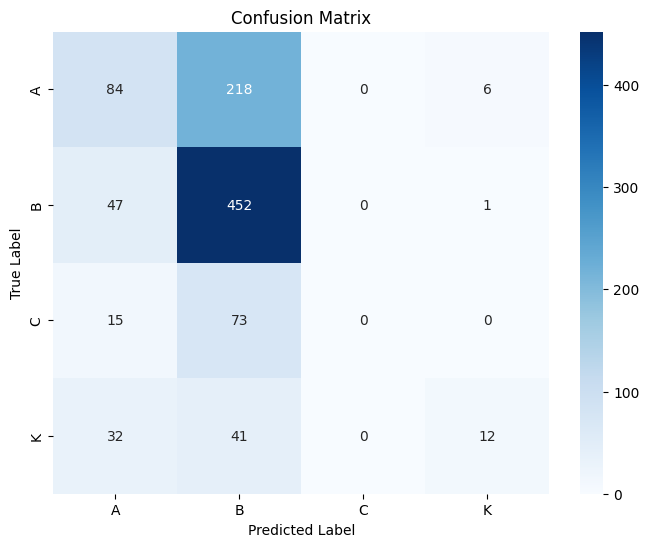

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['A', 'B', 'C', 'K']
label_to_num = {label: i for i, label in enumerate(class_labels)}
y_test_numeric = [label_to_num[label] for label in y_test]
y_pred_numeric = [label_to_num[label] for label in y_pred]


cm = confusion_matrix(y_test_numeric, y_pred_numeric)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
# One vs Rest classifier with SVM
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

svm_classifier = OneVsOneClassifier(SVC(kernel='linear'))
svm_classifier.fit(X_train_prepared, y_train)
y_pred = svm_classifier.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5504587155963303


In [55]:
# Predict fatal vs non-serious
# 1 is SEVERE, 0 is NON-SERIOUS

crash_two_classes = crash_data.copy()
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'K', 'CRASH_SEVERITY'] = 1
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'A', 'CRASH_SEVERITY'] = 1
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'B', 'CRASH_SEVERITY'] = 0
crash_two_classes.loc[crash_two_classes['CRASH_SEVERITY'] == 'C', 'CRASH_SEVERITY'] = 0

X = crash_two_classes.drop(columns=["CRASH_SEVERITY", "PEDESTRIANS_KILLED", 'PEDESTRIANS_INJURED', 'CRASH_YEAR',
                                    'CRASH_MILITARY_TM', 'longitude', 'latitude'], axis = 1)
y = crash_two_classes["CRASH_SEVERITY"].copy()
y = y.astype('int')

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

crash_num = X_train.select_dtypes(include=[np.number])
crash_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
])

In [56]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_val_prepared = full_pipeline.transform(X_val)
X_test_prepared = full_pipeline.transform(X_test)

# rfc = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rfc = RandomForestClassifier(max_depth= 14, max_features= 'log2', min_samples_leaf= 9, min_samples_split= 3, n_estimators= 101)

rfc.fit(X_train_prepared, y_train)
y_pred = rfc.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6758409785932722


Number of features: 26


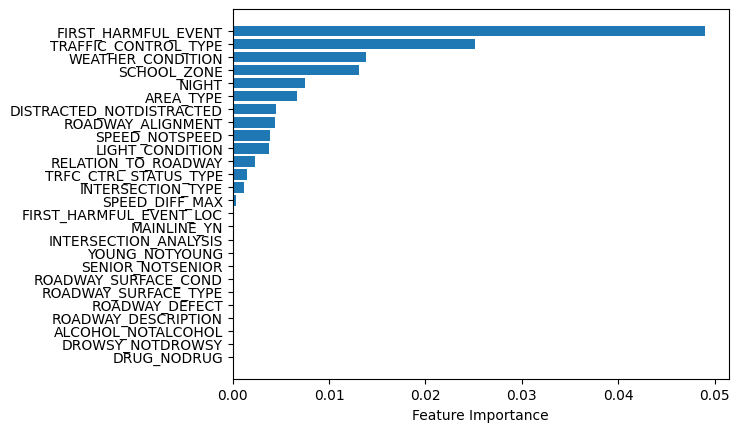

In [57]:
feature_importances = rfc.feature_importances_
indices = feature_importances.argsort()

print("Number of features:", len(X_train.columns))
valid_indices = indices[indices < len(X_train.columns)]

# Plot feature importances using valid indices
plt.barh(range(len(valid_indices)), feature_importances[valid_indices])
plt.yticks(range(len(valid_indices)), X_train.columns[valid_indices])
plt.xlabel('Feature Importance')
plt.show()

In [58]:
rfc = RandomForestClassifier()

param_dist = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

random_search.fit(X_train_prepared, y_train)

print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 15, 'min_samples_split': 12, 'n_estimators': 81}


In [59]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_prepared, y_train)
y_pred = svm_classifier.predict(X_test_prepared)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6748216106014271


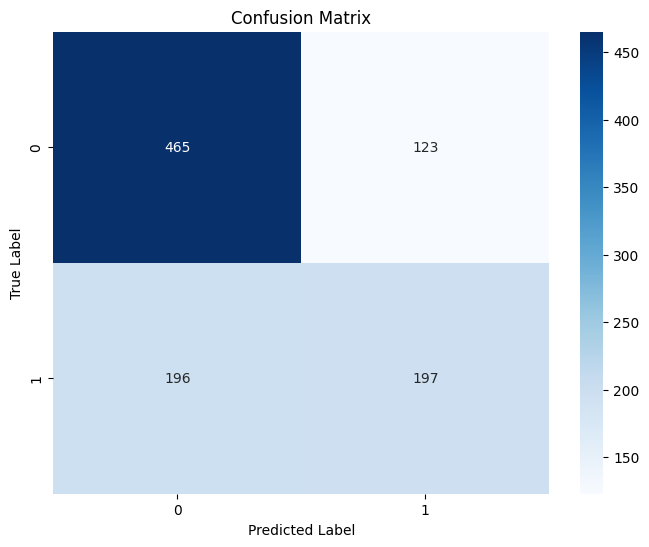

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## K-means Clustering

In [61]:
# prepare data
X = crash_data.drop(columns=['longitude', 'latitude', "CRASH_SEVERITY", "PEDESTRIANS_KILLED", 'PEDESTRIANS_INJURED'], axis = 1)
X_full = crash_data.copy()

crash_num = X.select_dtypes(include=[np.number])
crash_cat = X.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)

num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

X_prepared = full_pipeline.fit_transform(X)

In [62]:
from sklearn.cluster import KMeans

# create a k_means algorithm with 4 clusters using all of the features
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans = kmeans.fit(X_prepared)
X_full["y_pred"] = kmeans.predict(X_prepared)

cluster_percentages = (
    X_full.groupby(['y_pred', 'CRASH_SEVERITY']).size() / X_full.groupby('y_pred').size()
).reset_index(name='percentage')
print(cluster_percentages)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    y_pred CRASH_SEVERITY  percentage
0        0              A    0.327175
1        0              B    0.464243
2        0              C    0.064362
3        0              K    0.144219
4        1              A    0.230559
5        1              B    0.617326
6        1              C    0.116644
7        1              K    0.035471
8        2              A    0.328947
9        2              B    0.377820
10       2              C    0.062030
11       2              K    0.231203
12       3              A    0.287928
13       3              B    0.554649
14       3              C    0.102773
15       3              K    0.054649


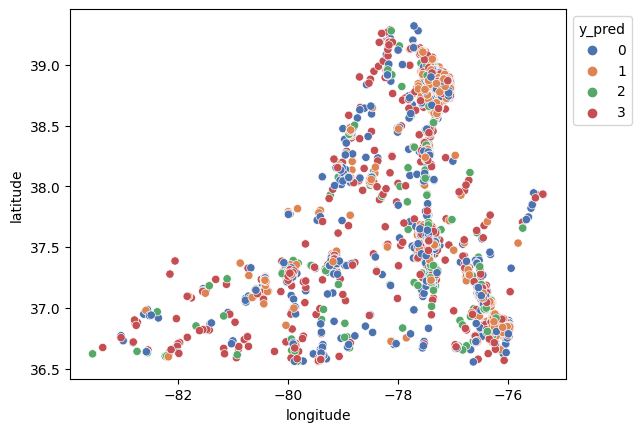

In [63]:
this_plot = sns.scatterplot(data=X_full,x='longitude',y='latitude',hue='y_pred', palette="deep" ) # Plot the fake data
sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1))

### K-Means with Road Condition

> Variable Definitions
- ROADWAY_SURFACE_COND: The roadway surface condition of the travel lanes
- RELATION_TO_ROADWAY: The location of the event in relation to the roadway (ex. acceleration/decceleration lanes)
- ROADWAY_DEFECT: Roadway defects at the scene of the crash that may have contributed to the crash
- ROADWAY_DESCRIPTION: The type of roadway facility at the location of the crash (ex. one way or two way)




In [66]:
X_road = crash_data[['ROADWAY_SURFACE_COND', 'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]
crash_num = X_road.select_dtypes(include=[np.number])

crash_cat = X_road.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])
X_road_prepared = full_pipeline.fit_transform(X_road)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


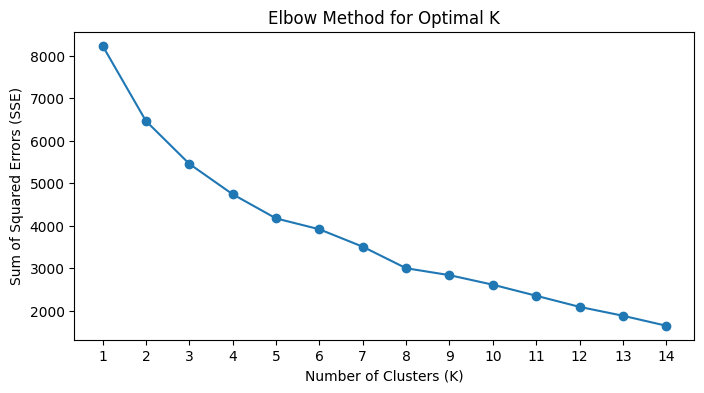

In [67]:
# look at an elbow graph to determine the optimal number of clusters
k_values = range(1, 15)
sse_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_road_prepared)
    sse_values.append(kmeans.inertia_)

# Plot the SSE values against K
plt.figure(figsize=(8, 4))
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()

In [ ]:
# cluster by looking at road conditions
X_road_prepared = full_pipeline.fit_transform(X_road)
kmeans = KMeans(n_clusters=8, random_state=42)

# fit the model to the prepared data
kmeans = kmeans.fit(X_road_prepared)

# predict the cluster labels for the test set
X["y_pred"] = kmeans.predict(X_road_prepared)

# print the cluster centers
# print(kmeans.cluster_centers_)
print(kmeans.inertia_)

In [ ]:
X_road = crash_data[['ROADWAY_SURFACE_COND', 'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]
crash_num = X_road.select_dtypes(include=[np.number])
crash_cat = X_road.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

In [ ]:
plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
plt.title('Severity of Pedestrian Accidents')
plt.xlabel('Longitude', labelpad=15)
plt.ylabel('Latitude', labelpad=30)
plt.show()

X_road_data = crash_data[['longitude', 'latitude', 'CRASH_SEVERITY', 'ROADWAY_SURFACE_COND',
                             'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]

X_road_cluster = full_pipeline.fit_transform(X_road)

# kmeans algorithm with optimal cluster number
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_road_cluster)
X_road_data['Cluster'] = cluster_labels


n_clusters = len(X_road_data['Cluster'].unique())

for cluster in X_road_data['Cluster'].unique():
  cluster_data = X_road_data[X_road_data['Cluster'] == cluster]
  plt.figure(figsize=(8, 4))
  severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

  longitude = cluster_data['longitude'].tolist()
  latitude = cluster_data['latitude'].tolist()
  severities = cluster_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
  m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

  categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
  m.drawcoastlines()
  m.drawstates()
  m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
  m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
  x, y = m(longitude, latitude)
  m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

  l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
  l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
  l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
  l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

  labels = ["A", "B", "C", "K"]
  leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                  handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
  plt.title(f'Cluster {cluster}')
  plt.xlabel('Longitude', labelpad=15)
  plt.ylabel('Latitude', labelpad=30)
  plt.show()

### K-Means with Weather/Road Condition

In [ ]:
X_road = crash_data[['ROADWAY_SURFACE_COND', 'WEATHER_CONDITION', 'LIGHT_CONDITION', 'NIGHT', 'SPEED_NOTSPEED', 'TRAFFIC_CONTROL_TYPE', 'ALCOHOL_NOTALCOHOL', 'INTERSECTION_TYPE']]
crash_num = X_road.select_dtypes(include=[np.number])
crash_cat = X_road.select_dtypes(exclude=[np.number])
num_attribs = list(crash_num)
cat_attribs = list(crash_cat)
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

In [ ]:
plt.figure(figsize=(10, 6))
severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

longitude = crash_data['longitude'].tolist()
latitude = crash_data['latitude'].tolist()
severities = crash_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
m.drawcoastlines()
m.drawstates()
m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
x, y = m(longitude, latitude)
m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

labels = ["A", "B", "C", "K"]
leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                 handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
plt.title('Severity of Pedestrian Accidents')
plt.xlabel('Longitude', labelpad=15)
plt.ylabel('Latitude', labelpad=30)
plt.show()

X_road_data = crash_data[['longitude', 'latitude', 'CRASH_SEVERITY', 'ROADWAY_SURFACE_COND',
                             'RELATION_TO_ROADWAY', "ROADWAY_DEFECT", 'ROADWAY_DESCRIPTION']]

X_road_cluster = full_pipeline.fit_transform(X_road)

# kmeans algorithm with optimal cluster number
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_road_cluster)
X_road_data['Cluster'] = cluster_labels


cluster_percentages = (
    X_road_data.groupby(['Cluster', 'CRASH_SEVERITY']).size() / X_road_data.groupby('Cluster').size()
).reset_index(name='percentage')
print(cluster_percentages)


n_clusters = len(X_road_data['Cluster'].unique())

for cluster in X_road_data['Cluster'].unique():
  cluster_data = X_road_data[X_road_data['Cluster'] == cluster]
  plt.figure(figsize=(8, 4))
  severity_mapping = {'A': 1, 'B': 2, 'C': 3, 'K': 4}

  longitude = cluster_data['longitude'].tolist()
  latitude = cluster_data['latitude'].tolist()
  severities = cluster_data['CRASH_SEVERITY'].map(severity_mapping).tolist()
  m = Basemap(projection='merc', resolution='l', llcrnrlat=36.5, urcrnrlat=39.5, llcrnrlon=-85.5, urcrnrlon=-75.0)

  categorical_colormap = plt.get_cmap('Set2', len(severity_mapping))
  m.drawcoastlines()
  m.drawstates()
  m.drawparallels(range(36, 40, 1), labels=[1,0,0,0])
  m.drawmeridians(range(-85, -74, 1), labels=[0,0,0,1])
  x, y = m(longitude, latitude)
  m.scatter(x, y, c=severities, cmap=categorical_colormap, marker='o', s=25, alpha=0.5, zorder=5)

  l1 = plt.scatter([],[], s=25, edgecolors='none', c='#66c2a5')
  l2 = plt.scatter([],[], s=25, edgecolors='none', c='#8da0cb')
  l3 = plt.scatter([],[], s=25, edgecolors='none', c='#ffd92f')
  l4 = plt.scatter([],[], s=25, edgecolors='none', c='#b3b3b3')

  labels = ["A", "B", "C", "K"]
  leg = plt.legend([l1, l2, l3, l4], labels, ncol=4, frameon=True, fontsize=8,
                  handlelength=2, loc='upper left', borderpad=1, handletextpad=1, title='Severity', scatterpoints=1)
  plt.title(f'Cluster {cluster}')
  plt.xlabel('Longitude', labelpad=15)
  plt.ylabel('Latitude', labelpad=30)
  plt.show()

## Basic Data Analysis on Important Features

- weather_condition
- traffic_control_type
- crash_year
- night
- school zone
- area_type
- distracted?
- roadway alignment
- speed
- light condition
- relation to roadway
- traffic control status
- intersection type
- speed diff max


In [9]:
crash_data.head()

,longitude,latitude,CRASH_YEAR,CRASH_MILITARY_TM,CRASH_SEVERITY,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,WEATHER_CONDITION,LIGHT_CONDITION,ROADWAY_SURFACE_COND,...,DROWSY_NOTDROWSY,DRUG_NODRUG,SPEED_NOTSPEED,INTERSECTION_ANALYSIS,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,AREA_TYPE,SPEED_DIFF_MAX
0,-76.589129,37.213034,2020,1135,A,0,1,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,...,No,No,No,Urban Intersection,No,No,Yes,No,Urban,NaN
1,-76.709165,37.333128,2020,1330,A,0,1,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,...,No,No,Yes,Not Intersection,No,No,Yes,No,Rural,45.0
2,-77.379622,37.214527,2020,1837,B,0,3,1. No Adverse Condition (Clear/Cloudy),5. Darkness - Road Not Lighted,1. Dry,...,No,No,No,Not Intersection,No,No,No,Yes,Urban,NaN
3,-77.221516,37.643252,2020,640,B,0,1,1. No Adverse Condition (Clear/Cloudy),5. Darkness - Road Not Lighted,1. Dry,...,No,No,No,Not Intersection,No,No,Yes,Yes,Rural,NaN
4,-76.350701,36.822881,2020,1053,A,0,1,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,...,No,No,No,Not Intersection,No,No,Yes,No,Urban,NaN


<Axes: xlabel='WEATHER_CONDITION', ylabel='count'>

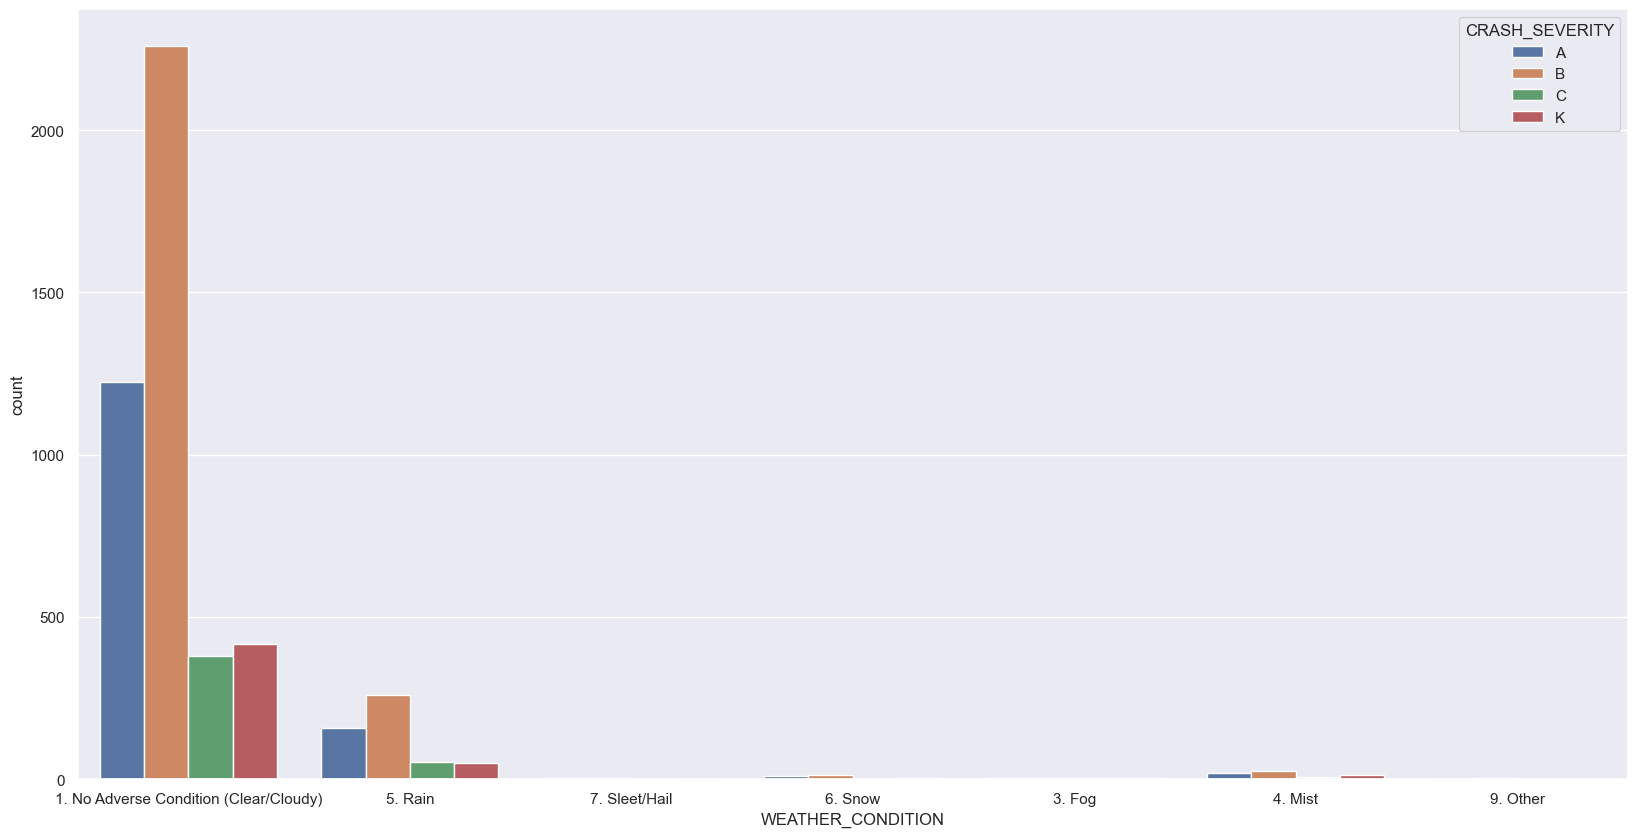

In [17]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='WEATHER_CONDITION',hue='CRASH_SEVERITY').set_title("Weather Condition Crashes Grouped by Crash Severity")

In [20]:
plt.figure(figsize=(200, 100))
sns.countplot(data=crash_data,x='TRAFFIC_CONTROL_TYPE',hue='CRASH_SEVERITY').set_title("Traffic Control Type Crashes Grouped by Crash Severity")

Text(0.5, 1.0, 'Traffic Control Type Crashes Grouped by Crash Severity')

Text(0.5, 1.0, 'Night Crashes Grouped by Crash Severity')

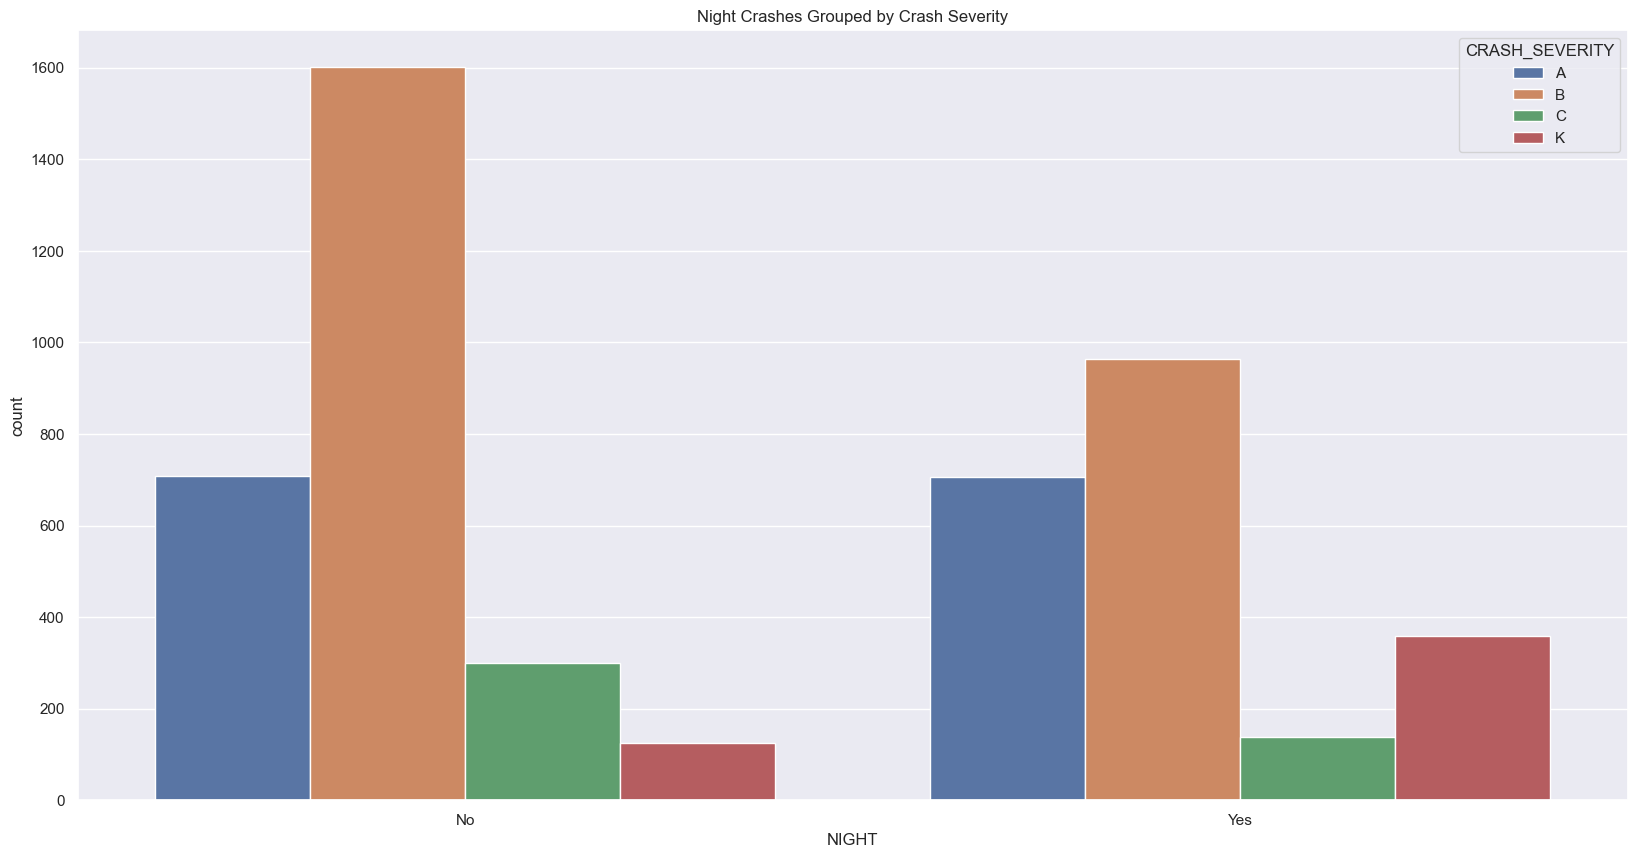

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='NIGHT',hue='CRASH_SEVERITY').set_title("Night Crashes Grouped by Crash Severity")

Text(0.5, 1.0, 'School Zone Crashes Grouped by Crash Severity')

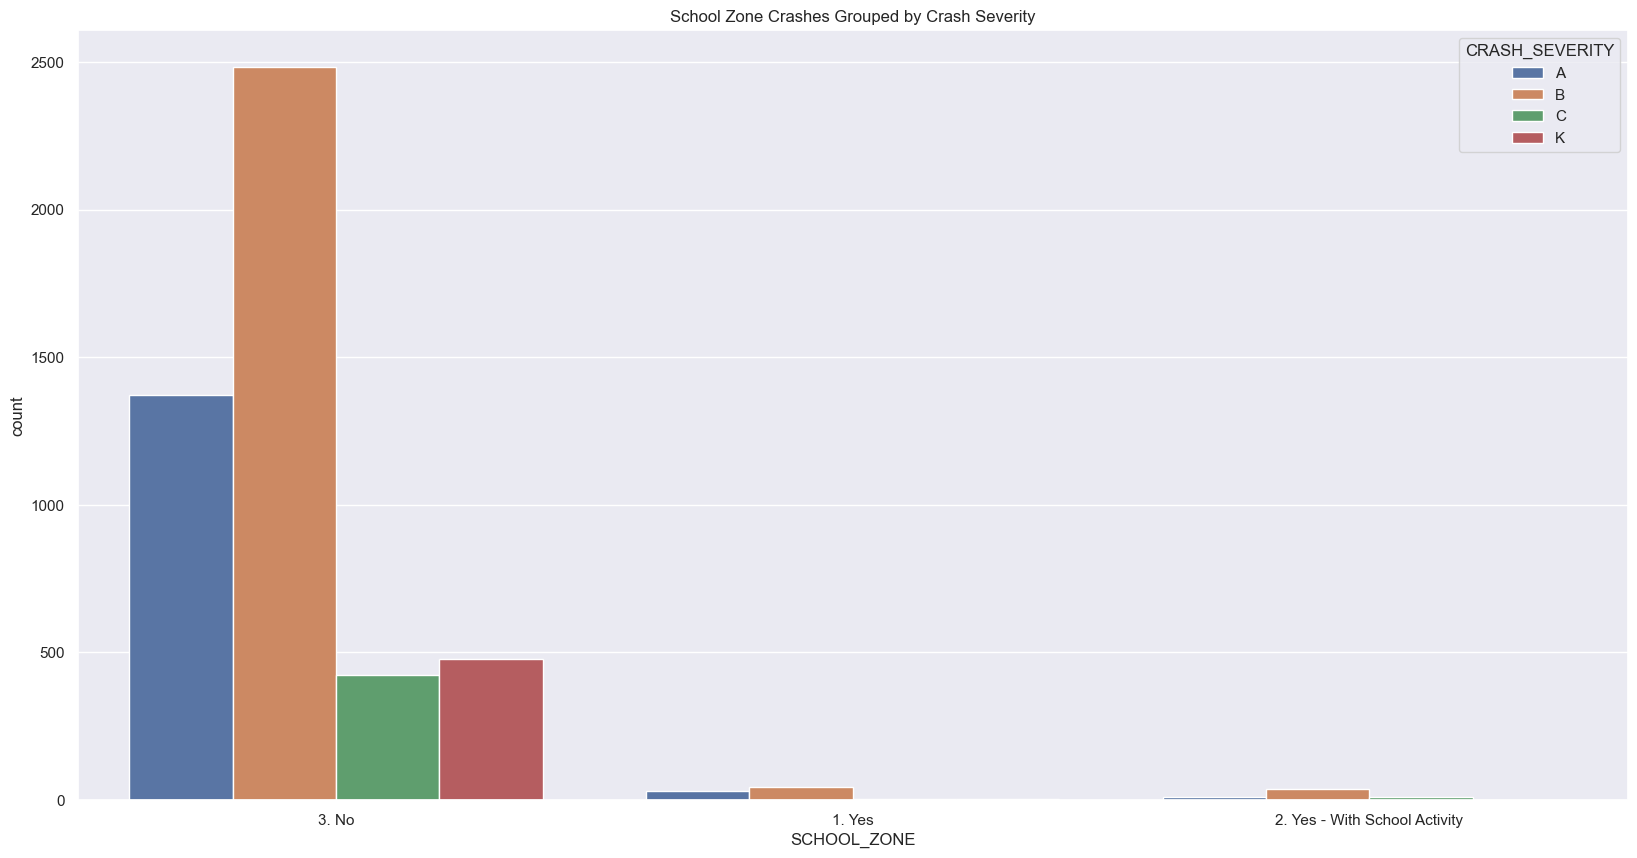

In [22]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='SCHOOL_ZONE',hue='CRASH_SEVERITY').set_title("School Zone Crashes Grouped by Crash Severity")

Text(0.5, 1.0, 'Area Type Crashes Grouped by Crash Severity')

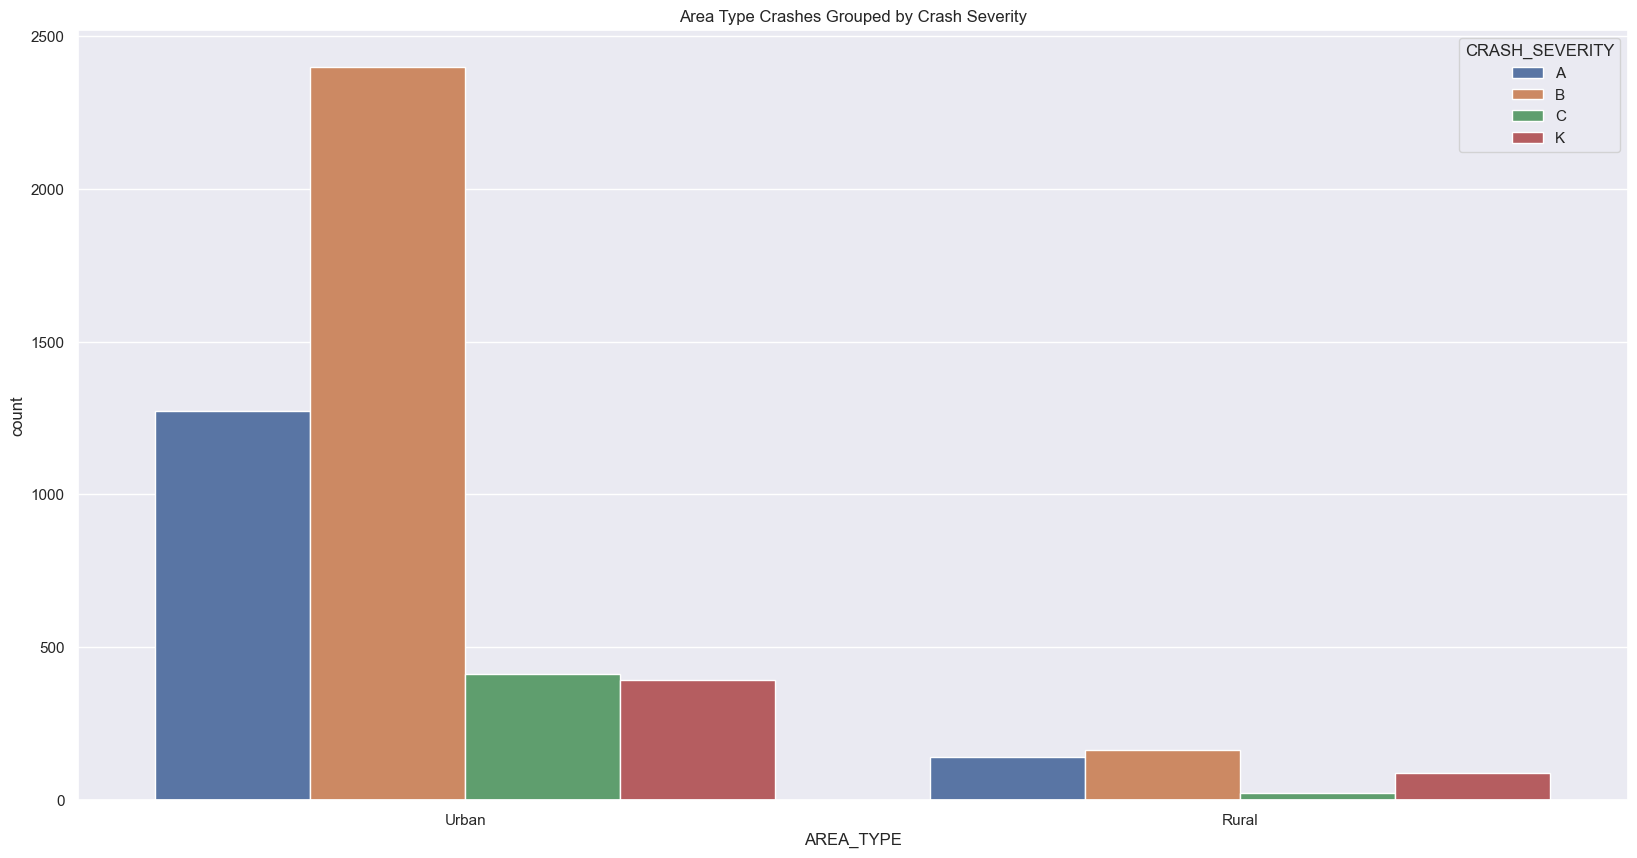

In [23]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='AREA_TYPE',hue='CRASH_SEVERITY').set_title("Area Type Crashes Grouped by Crash Severity")

Text(0.5, 1.0, 'Distracted Driver Crashes Grouped by Crash Severity')

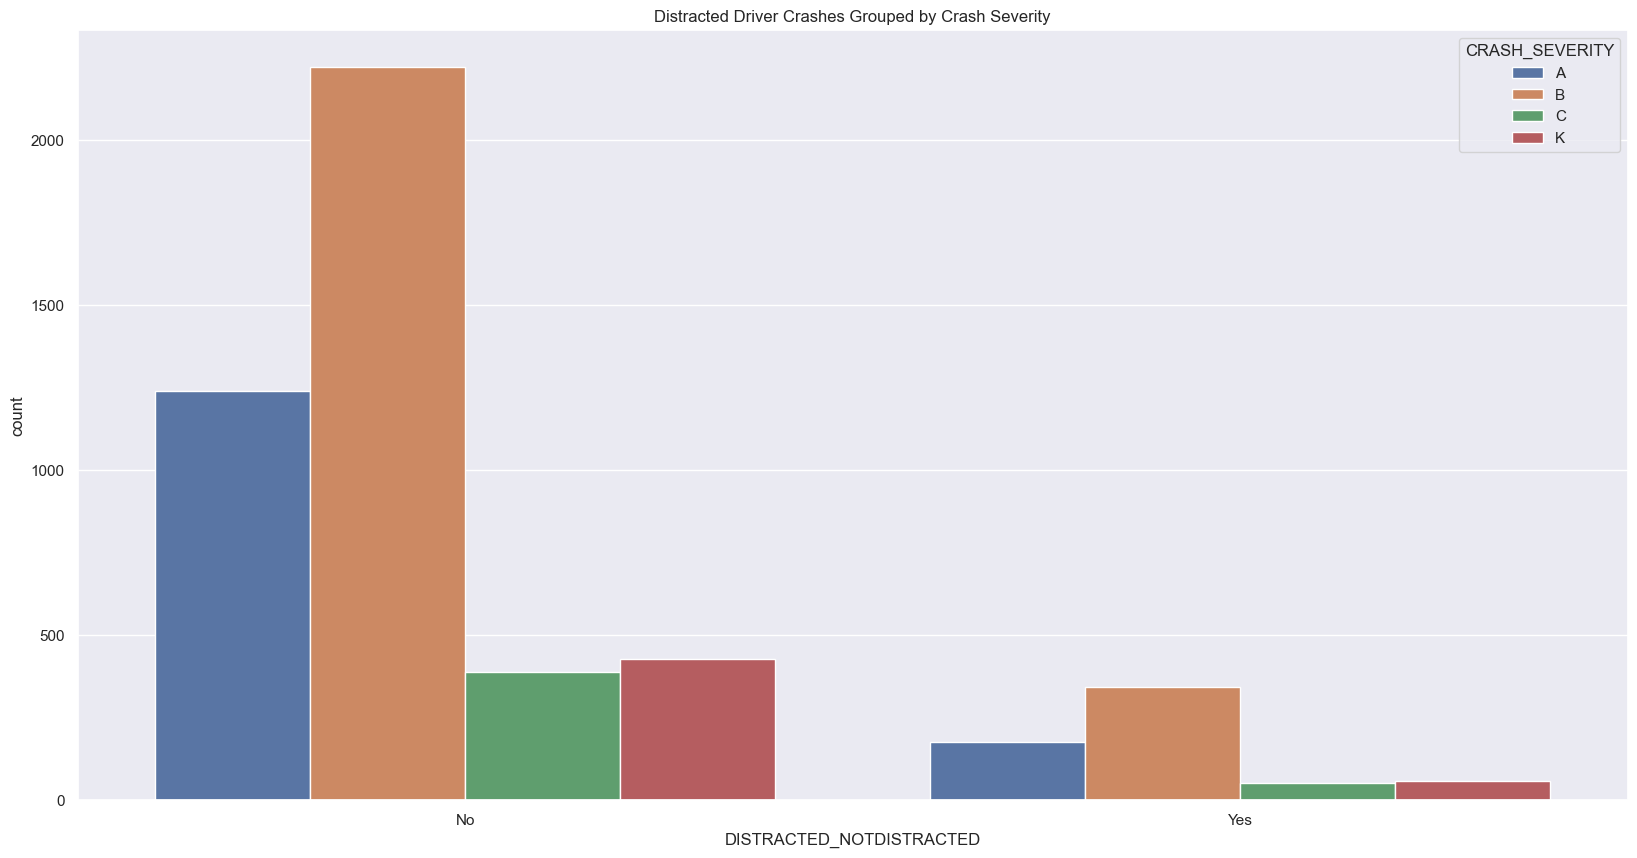

In [24]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='DISTRACTED_NOTDISTRACTED',hue='CRASH_SEVERITY').set_title("Distracted Driver Crashes Grouped by Crash Severity")

Text(0.5, 1.0, 'Crashes Grouped by Crash Severity and Roadway Alignment')

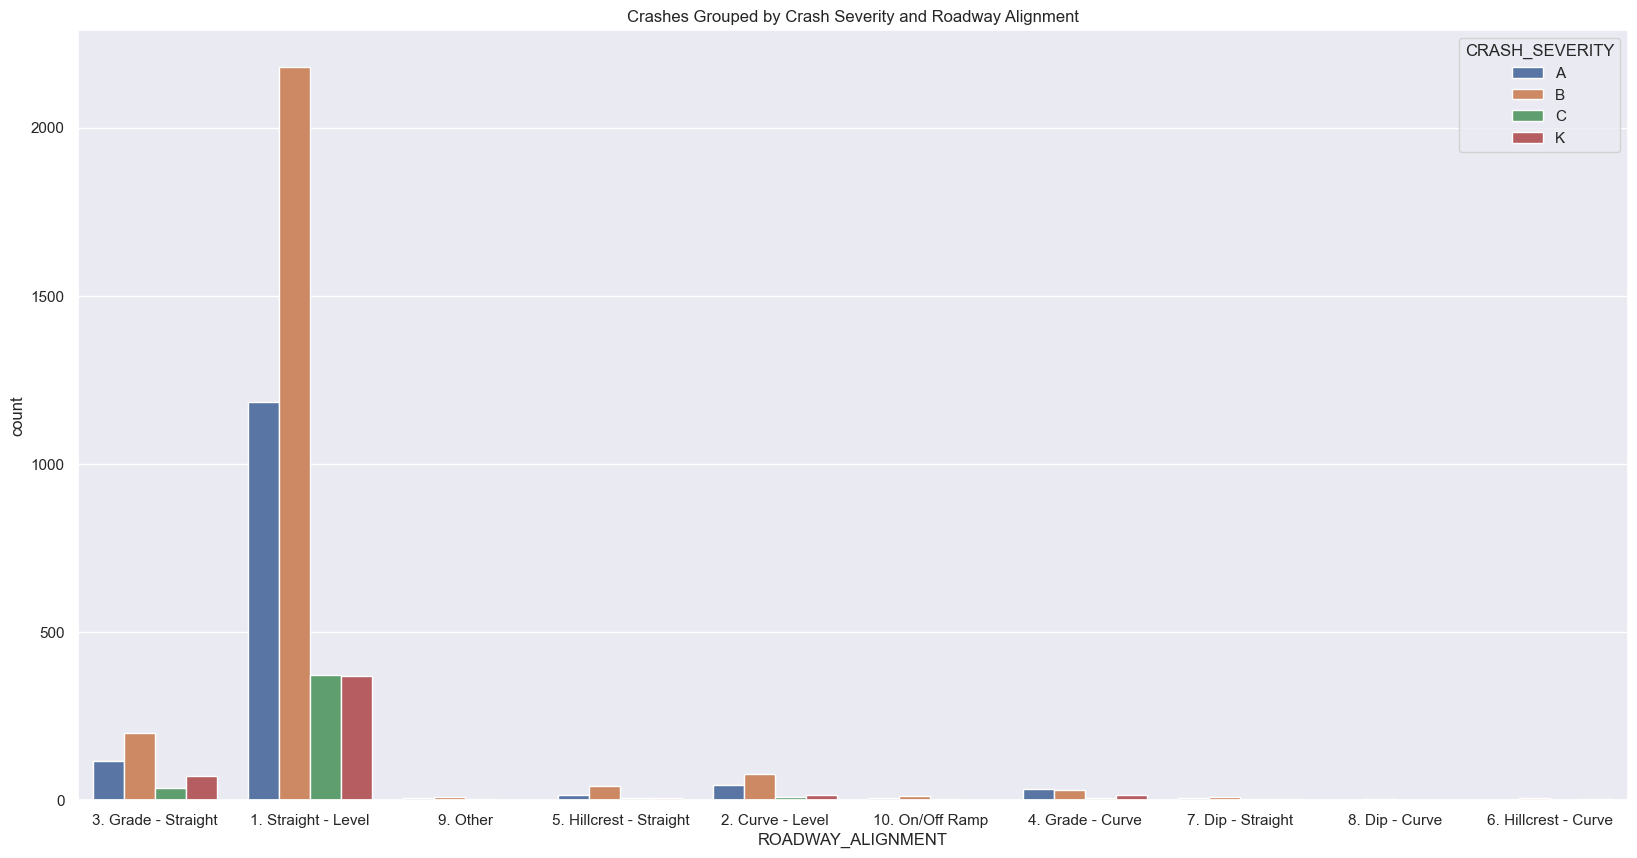

In [25]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='ROADWAY_ALIGNMENT',hue='CRASH_SEVERITY').set_title("Crashes Grouped by Crash Severity and Roadway Alignment")

Text(0.5, 1.0, 'Speeding Driver Crashes Grouped by Crash Severity')

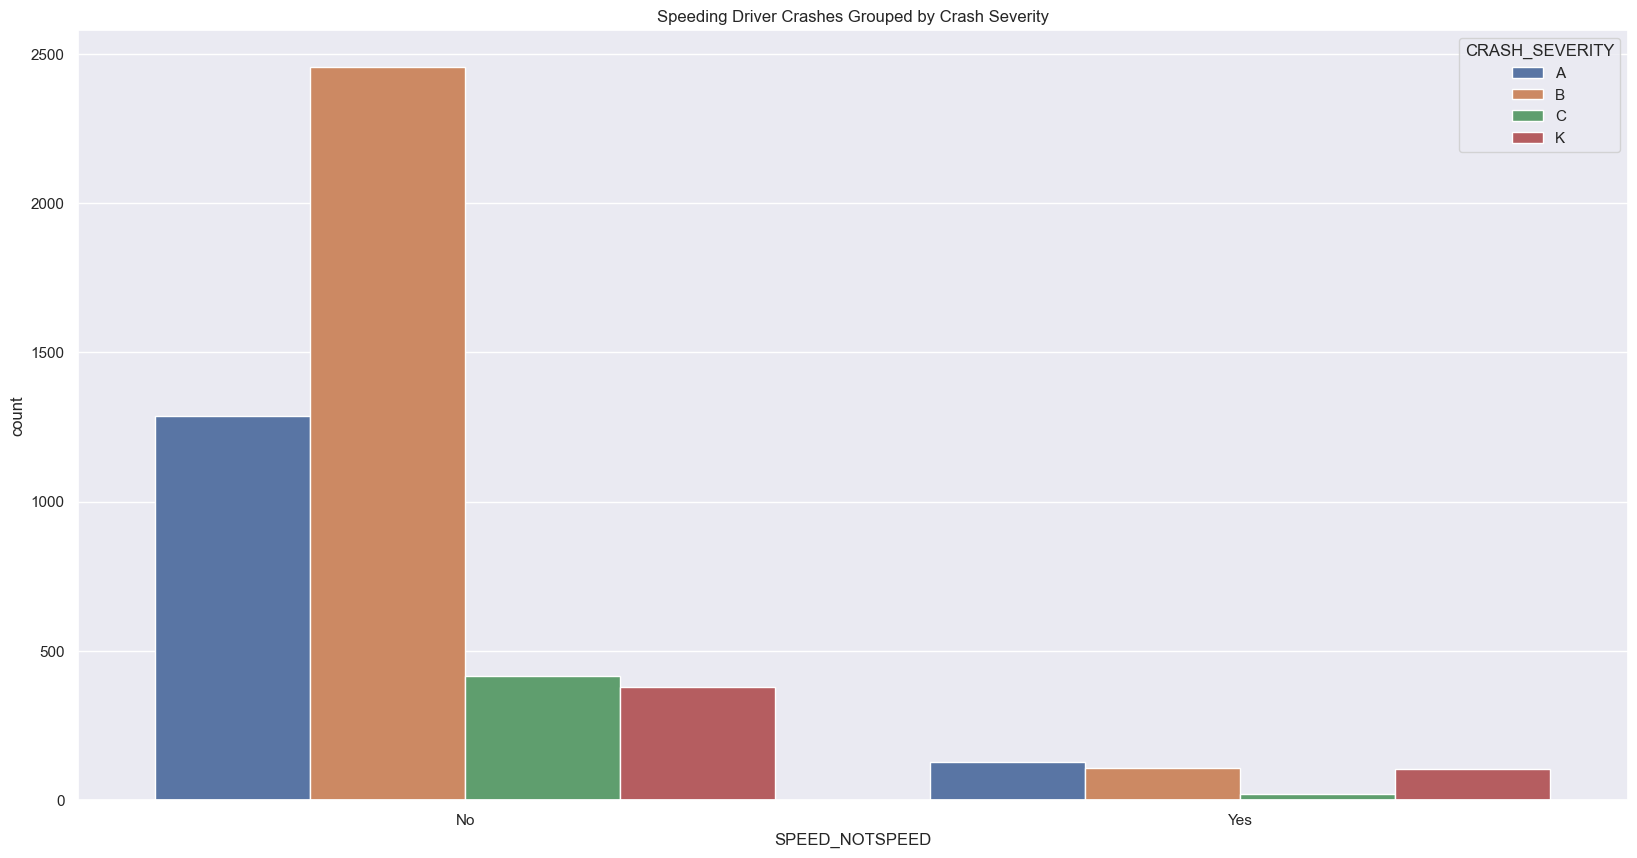

In [28]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='SPEED_NOTSPEED',hue='CRASH_SEVERITY').set_title("Speeding Driver Crashes Grouped by Crash Severity")

Text(0.5, 1.0, 'Light Condition Crashes Grouped by Crash Severity')

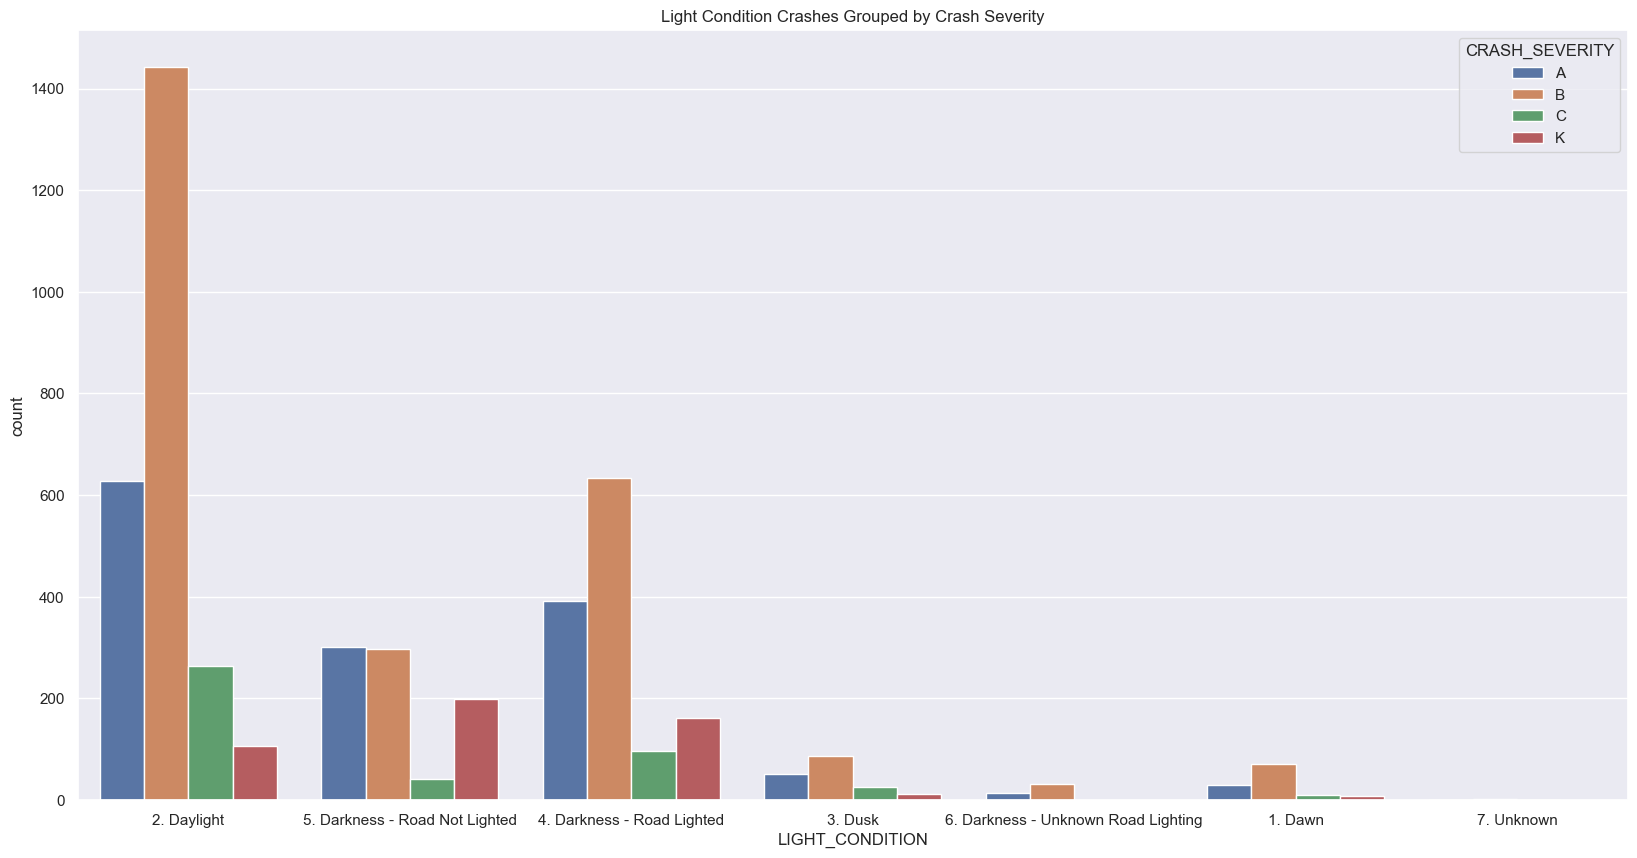

In [29]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='LIGHT_CONDITION',hue='CRASH_SEVERITY').set_title("Light Condition Crashes Grouped by Crash Severity")

In [31]:
plt.figure(figsize=(200, 100))
sns.countplot(data=crash_data,x='RELATION_TO_ROADWAY',hue='CRASH_SEVERITY').set_title("Crashes Grouped by Crash Severity and Relation to Roadway")

Text(0.5, 1.0, 'Crashes Grouped by Crash Severity and Relation to Roadway')

Text(0.5, 1.0, 'Crashes Grouped by Crash Severit and Traffic Control Status Type')

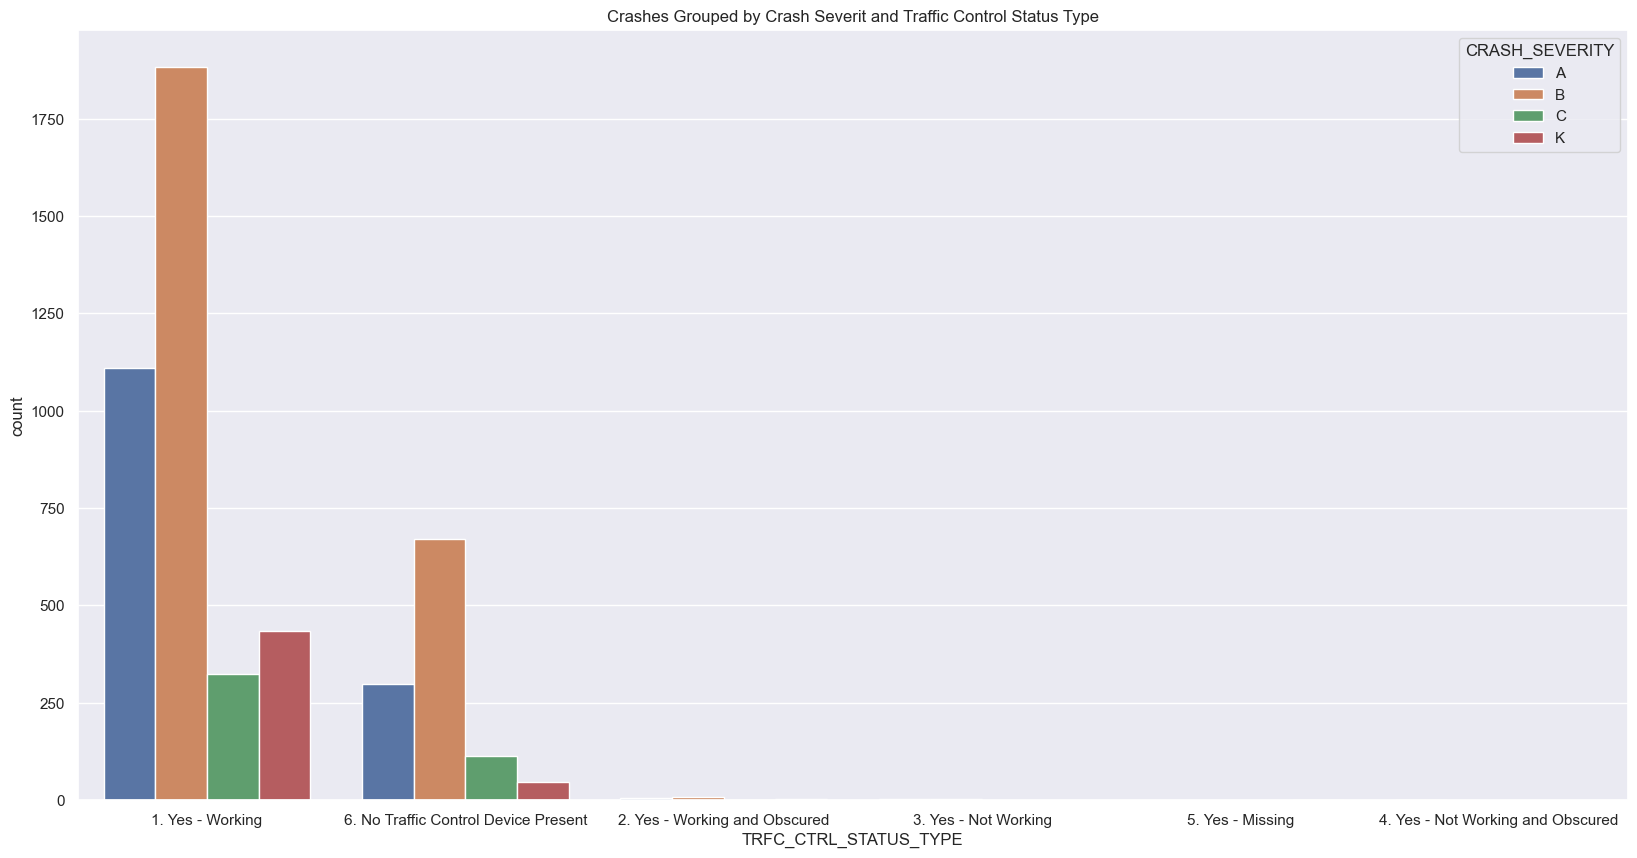

In [32]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='TRFC_CTRL_STATUS_TYPE',hue='CRASH_SEVERITY').set_title("Crashes Grouped by Crash Severit and Traffic Control Status Type")

Text(0.5, 1.0, 'Crashes Grouped by Crash Severity and Intersection Type')

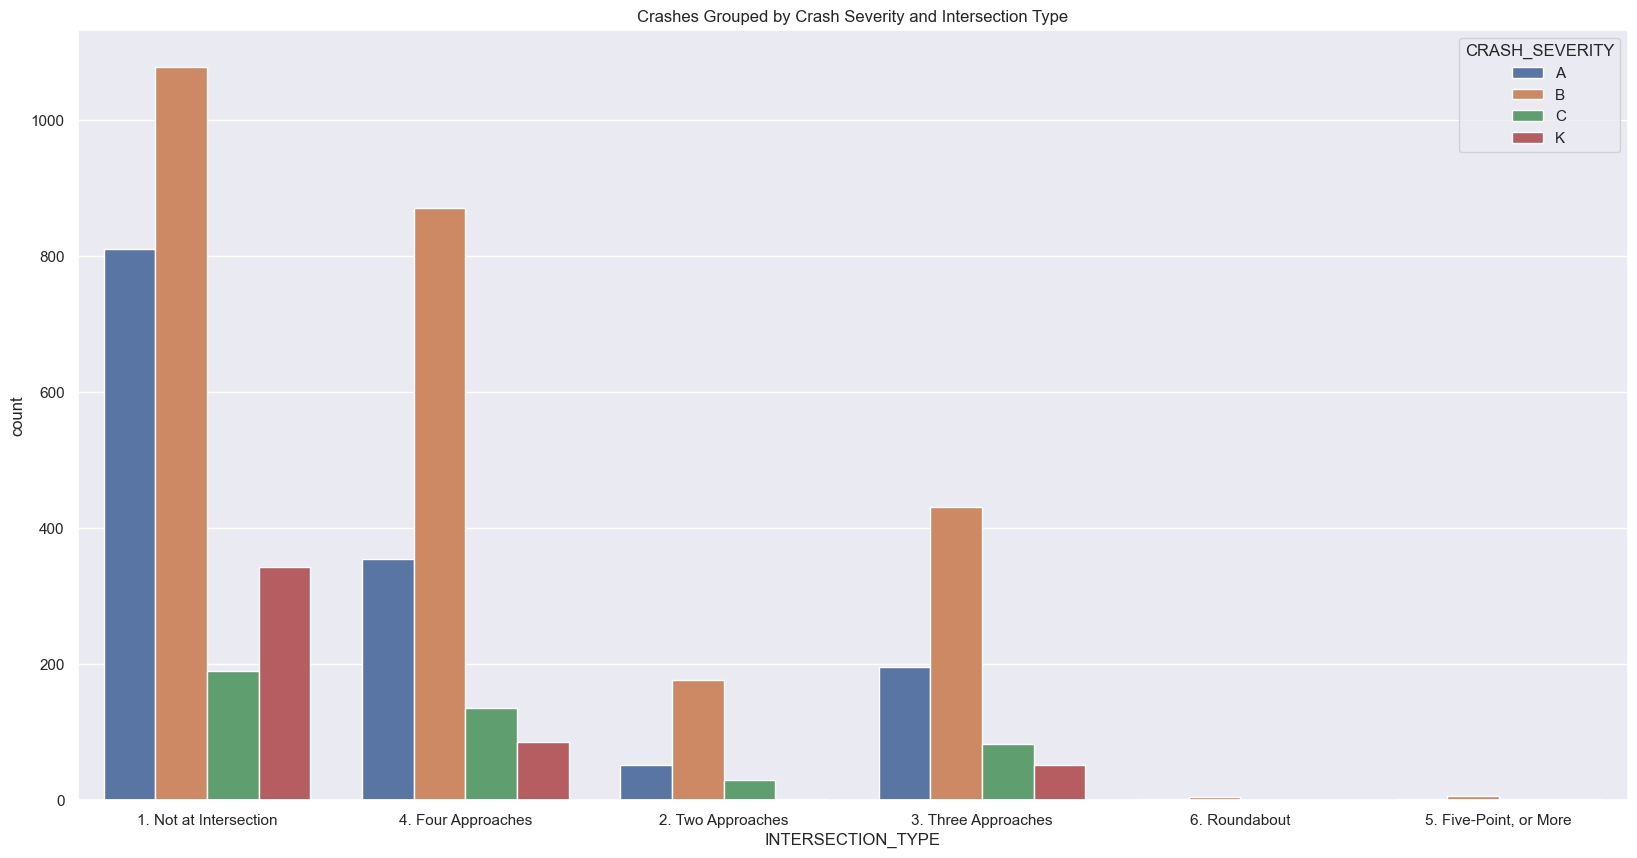

In [33]:
plt.figure(figsize=(20, 10))
sns.countplot(data=crash_data,x='INTERSECTION_TYPE',hue='CRASH_SEVERITY').set_title("Crashes Grouped by Crash Severity and Intersection Type")

Text(0.5, 1.0, 'Crashes Grouped by Crash Severit and Speed_Diff_Max')

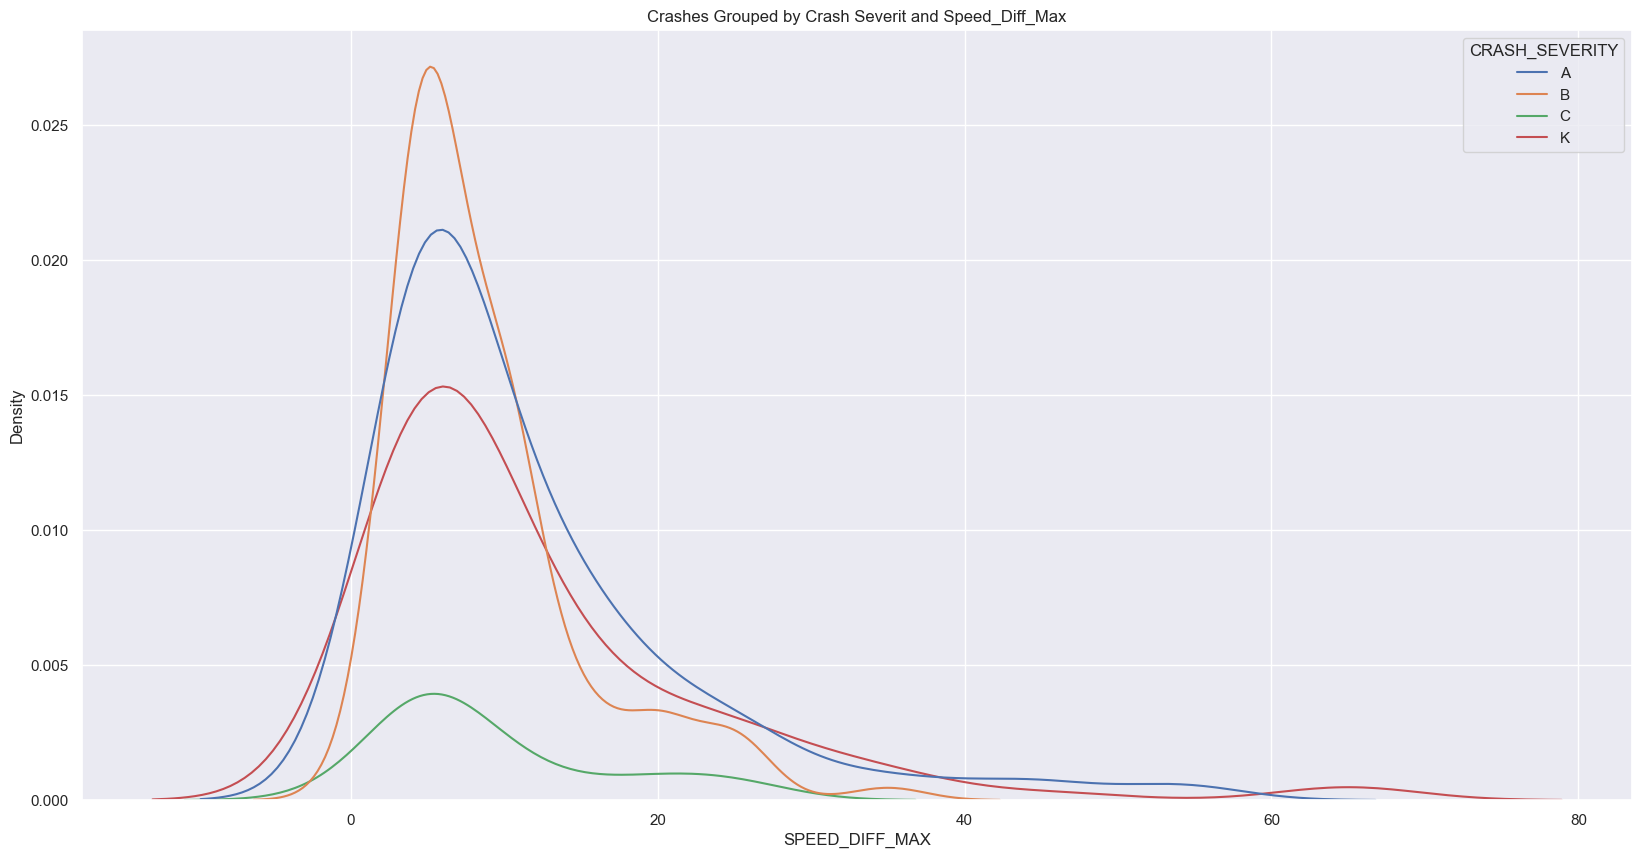

In [35]:
plt.figure(figsize=(20, 10))
sns.kdeplot(data=crash_data,x='SPEED_DIFF_MAX',hue='CRASH_SEVERITY').set_title("Crashes Grouped by Crash Severit and Speed_Diff_Max")